In [2]:
#Inverse

import numpy as np
import cv2
import matplotlib.pyplot as plt



pic = cv2.imread("bear.jpg")
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB) 

#그레이스케일로 할때는 이부분
pic = cv2.imread("lya-lc.bmp", 0)
h, w = np.shape(pic)
pic_hist = make_hist(pic)


plt.title("pic")
plt.imshow(pic)

#영상을 반전시키세요
pic_inverted = ~pic

plt.figure()
plt.title("Inverted")
plt.imshow(pic_inverted)



#그레이스케일로 할때는 이부분
plt.imshow(pic_inverted, vmin = 0, vmax = 255)



#gray scale에 대해서도 반전하여 출력
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("Before")
plt.imshow(pic, cmap='gray', vmin = 0, vmax = 255)
plt.subplot(2,2,2)
plt.title("After")
plt.imshow(pic_inverted, cmap='gray', vmin = 0, vmax = 255)

NameError: name 'make_hist' is not defined

최소 밝기 :  62
최대 밝기 :  221
최소 밝기 :  75
최대 밝기 :  185
slope :  2.3181818181818183
(max-min)*slope :  255.00000000000003


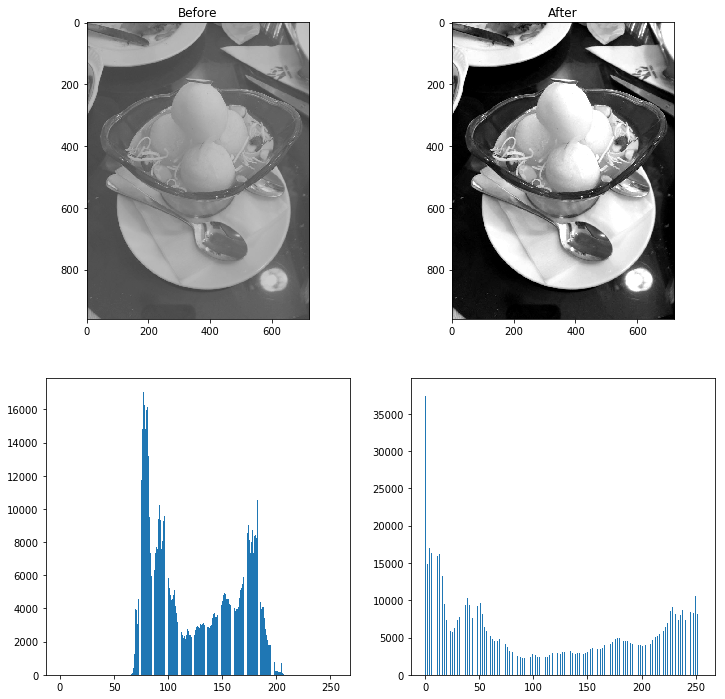

In [95]:
#Contrast stretching

### make_hist 함수
### 입력 : grayscale 이미지
### 출력 : histogram 배열
### 기능 : grayscale 이미지를 입력받아 histogram [0~255]을 계산하고 return 해주는 함수
def make_hist (image):
    assert len(image.shape) == 2, "grayscale 영상을 입력해주세요. "
    histogram = np.zeros((256), dtype=np.int32)
    h, w = image.shape
    for i in range(h):
        for j in range(w):
            value = image[i, j]
            histogram[value] += 1
    return histogram

lena_before = cv2.imread("5.jpg", 0)
h, w = np.shape(lena_before)
lena_hist = make_hist(lena_before)


#영상의 최소, 최대 밝기 계산
max_value = 0
min_value = 255
#0 -> 255로 탐색하며 최소 최대 밝기 찾기
for i in np.arange(0,256,1):
    freq = lena_hist[i]
    if freq != 0:
        min_value = i
        break
#255- > 0으로 탐색하며 최대 밝기 찾기
for i in np.arange(255,-1,-1):
    freq = lena_hist[i]
    if freq != 0:
        max_value = i
        break
print("최소 밝기 : ", min_value)
print("최대 밝기 : ", max_value)


# 노이즈에 강건한 최소, 최대 밝기 계산
# (픽셀 개수 5% 미만까지는 skip)
max_value = 0
min_value = 255
sum_low = 0
sum_high = 0
num_pixel = w*h# 픽셀 개수
for i in np.arange(0, 256, 1):
    freq = lena_hist[i]
    sum_low += freq
    if sum_low > num_pixel * 0.05:
        min_value = i
        break
for i in np.arange(255,-1,-1):
    freq = lena_hist[i]
    sum_high += freq
    if sum_high > num_pixel * 0.05:
        max_value = i
        break
print("최소 밝기 : ", min_value)
print("최대 밝기 : ", max_value)

#slope 계산
slope = 255 / (max_value - min_value)
print("slope : ", slope)
print("(max-min)*slope : ", (max_value - min_value)*slope)

#histogram stretching 수행
lena_after = np.zeros((h,w), dtype=np.uint8)
for i in range(h):
    for j in range(w):
        value = lena_before[i,j]
        if value < min_value:
            lena_after[i, j] = 0
        elif value > max_value:
            lena_after[i, j] = 255
        else:
            lena_after[i, j] = np.uint8(value - min_value) * slope
            
# 결과 연산 출력
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("Before")
plt.imshow(lena_before, cmap='gray', vmin = 0, vmax = 255)

plt.subplot(2,2,2)
plt.title("After")
plt.imshow(lena_after, cmap='gray', vmin = 0, vmax = 255)

plt.subplot(2,2,3)
before_hist = make_hist(lena_before)
x = np.arange(256)
plt.bar(x, height=before_hist)

plt.subplot(2,2,4)
after_hist = make_hist(lena_after)
x = np.arange(256)
plt.bar(x, height=after_hist)

plt.show()

In [26]:
#color stratching-RGB
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt


#이미지의 R부분 처리
def normalizeRed(intensity):
    iI = intensity
    minI = 86
    maxI = 230
    minO = 0
    maxO = 255
    iO = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO
 
# 이미지의 G부분 처리
def normalizeGreen(intensity):
    iI = intensity
    minI = 90
    maxI = 225
    minO = 0
    maxO = 255
    iO = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# 이미지의 B부분 처리
def normalizeBlue(intensity):
    iI = intensity
    minI = 100
    maxI = 210
    minO = 0
    maxO = 255
    iO = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO


 
# RGB각 색상 대역에서 대비를 늘리는 포인트 작업 적용
normalizedRedBand = multiBands[0].point(normalizeRed)
normalizedGreenBand = multiBands[1].point(normalizeGreen)
normalizedBlueBand = multiBands[2].point(normalizeBlue)


imageObject     = Image.open("./lya-lc.bmp")
image = cv2.imread('./lya-lc.bmp')

# Split the red, green and blue bands from the Image
multiBands      = imageObject.split()


# 명암이 늘어난 RGB 새 이미지 만들기
normalizedImage = Image.merge("RGB", (normalizedRedBand, normalizedGreenBand, normalizedBlueBand))

# 스트레칭 전 이미지 출력
imageObject.show()

# 스트레칭 후 이미지 출력
normalizedImage.show()

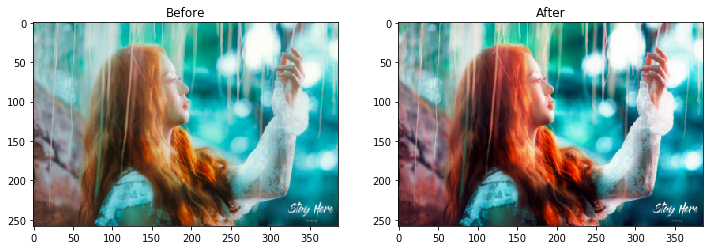

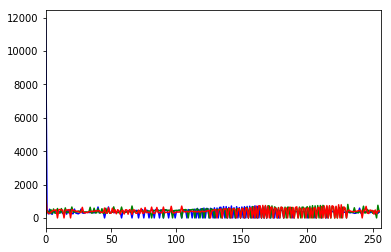

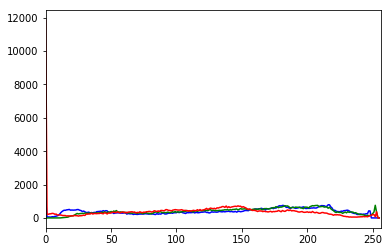

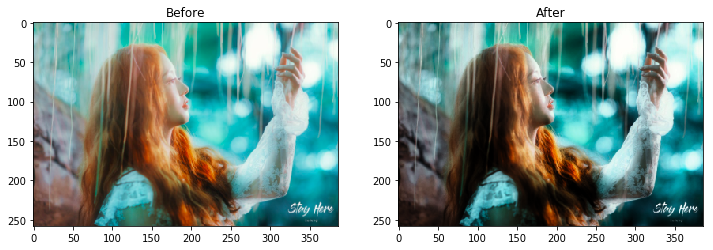

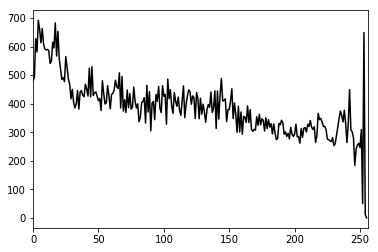

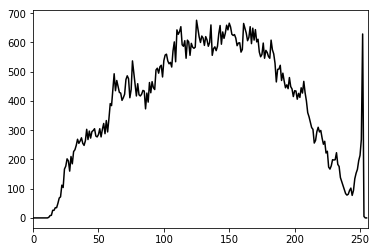

In [22]:
#color equalizing-RGB
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import cv2
import numpy as np
from matplotlib import ticker

def draw_image_histogram(image, channels, color='k'):
    hist = cv2.calcHist([image], channels, None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

def show_color_histogram(image):
    for i, col in enumerate(['b', 'g', 'r']):
        draw_image_histogram(image, [i], color=col)
    plt.show()

    
def show_grayscale_histogram(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    draw_image_histogram(grayscale_image, [0])
    plt.show()
    
    


def show_rgb_equalized(image):
    channels = cv2.split(image)
    eq_channels = []
    for ch, color in zip(channels, ['B', 'G', 'R']):
        eq_channels.append(cv2.equalizeHist(ch))
    eq_image = cv2.merge(eq_channels)
    eq_image = cv2.cvtColor(eq_image, cv2.COLOR_BGR2RGB)
    plt.imshow(eq_image)
    plt.show()
    show_color_histogram(eq_image)
    
image = cv2.imread("girl.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("Before")
plt.imshow(image)

image2 = cv2.imread("girl.png")
plt.subplot(2,2,2)
plt.title("After")
show_rgb_equalized(image2)
show_color_histogram(image2)




#color equalizing-HSV

def show_hsv_equalized(image):
    H, S, V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
    eq_V = cv2.equalizeHist(V)
    eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2RGB)
    plt.imshow(eq_image)
    plt.show()
    show_grayscale_histogram(eq_image)
    
image3 = cv2.imread("girl.png")
image3 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB) 
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("Before")
plt.imshow(image3)

image4 = cv2.imread("girl.png")
plt.subplot(2,2,2)
plt.title("After")
show_hsv_equalized(image4)
show_grayscale_histogram(image4)

영상 크기 :  960 721
uint:  2703.75
T :  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   1.   2.   3.   3.   4.   5.   6.   7.  10.  12.  16.  19.
  22.  26.  30.  33.  37.  40.  44.  47.  50.  53.  55.  57.  59.  60.
  62.  63.  64.  66.  67.  69.  71.  72.  74.  76.  78.  80.  82.  84.
  86.  88.  89.  91.  93.  95.  98. 100. 101. 103. 104. 105. 107. 108.
 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 120. 121.
 122. 122. 123. 123. 124. 125. 125. 126. 126. 126. 127. 127. 128. 129.
 129. 130. 130. 131. 131. 132. 132. 133. 134. 134. 135. 135. 136. 137.
 137. 138. 138. 139. 140. 140. 141. 142. 142. 143. 144. 145. 145. 146.
 146. 147. 148. 148. 149. 150. 150. 151. 152. 152. 153. 154. 155. 156.
 156. 157. 158. 159. 160. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 176. 177. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 186. 187. 188. 189.

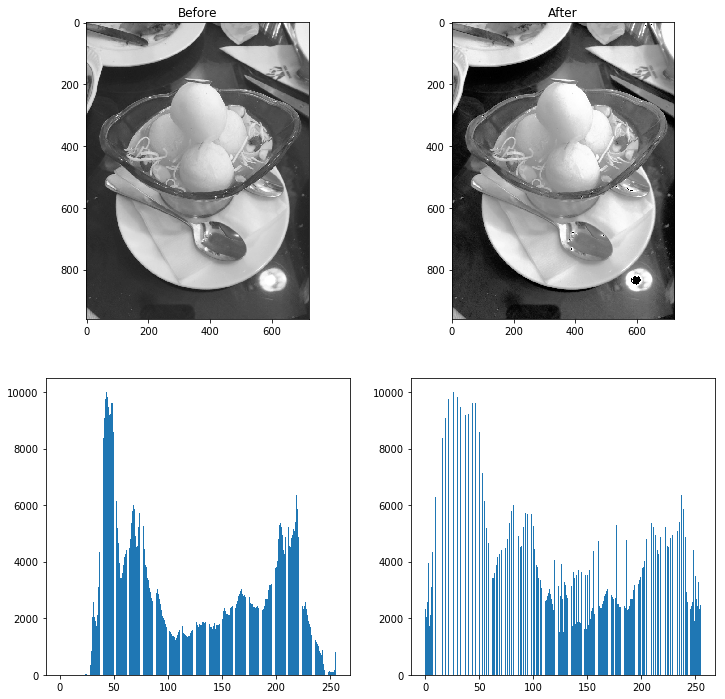

In [129]:
#Histogram equalization

#저대비(low contrast)영상 불러오기
lena_before = cv2.imread("2.jpg", 0)
h, w = np.shape(lena_before)

lena_after = np.zeros((h,w), dtype=np.uint8)

#한 칸에 얼마의 값이 들어가야 하는지
uint = h*w / 256
print("영상 크기 : ", h, w)
print("uint: ", uint)

#히스토그램 계산
lena_hist = make_hist(lena_before)

#변환 함수 만들기
T=np.zeros((256))
hist_sum = 0
for i in range(256):
    hist_sum += lena_hist[i]
    T[i] = np.uint8(hist_sum / uint)
    
print("T : ", T)

#Equalization 수행
for i in range(h):
    for j in range(w):
        value = lena_before[i, j]
        lena_after[i, j] = T[value]#기존 밝기값 value가 H를 통해 매핑됨
        

#결과 영상 출력
plt.figure(figsize=(12,12))#출력 크기 조절

plt.subplot(2,2,1)
plt.title("Before")
plt.imshow(lena_before, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title("After")
plt.imshow(lena_after, cmap = 'gray', vmin=0, vmax=255)

plt.subplot(2,2,3)
before_hist = make_hist(lena_before)
x = np.arange(256)#0~255
plt.bar(x, height = before_hist)#막대그래프 그리기

plt.subplot(2,2,4)
after_hist = make_hist(lena_after)
x = np.arange(256)#0~255
plt.bar(x, height = after_hist)#막대그래프 그리기

plt.show()

In [4]:
#Histogram equalization

#저대비(low contrast)영상 불러오기
lena_before = cv2.imread("chrom.png", 0)
h, w = np.shape(lena_before)

lena_after = np.zeros((h,w), dtype=np.uint8)

#한 칸에 얼마의 값이 들어가야 하는지
uint = h*w / 256
print("영상 크기 : ", h, w)
print("uint: ", uint)

#히스토그램 계산
lena_hist = make_hist(lena_before)

#변환 함수 만들기
T=np.zeros((256))
hist_sum = 0
for i in range(256):
    hist_sum += lena_hist[i]
    T[i] = np.uint8(hist_sum / uint)
    
print("T : ", T)

#Equalization 수행
for i in range(h):
    for j in range(w):
        value = lena_before[i, j]
        lena_after[i, j] = T[value]#기존 밝기값 value가 H를 통해 매핑됨
        

#결과 영상 출력
plt.figure(figsize=(12,12))#출력 크기 조절

plt.subplot(2,2,1)
plt.title("Before")
plt.imshow(lena_before, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title("After")
plt.imshow(lena_after, cmap = 'gray', vmin=0, vmax=255)

plt.subplot(2,2,3)
before_hist = make_hist(lena_before)
x = np.arange(256)#0~255
plt.bar(x, height = before_hist)#막대그래프 그리기

plt.subplot(2,2,4)
after_hist = make_hist(lena_after)
x = np.arange(256)#0~255
plt.bar(x, height = after_hist)#막대그래프 그리기

plt.show()

영상 크기 :  1200 1200
uint:  5625.0


NameError: name 'make_hist' is not defined

True

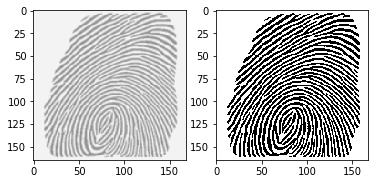

In [19]:
#Thresholding

finger_image = cv2.imread("finger-gray.bmp", 0)
h,w = np.shape(finger_image)

thresh_image = np.zeros((h,w), dtype = np.uint8)

#임계값 설정
thresh_value = 200

for i in range(h):
    for j in range(w):
        if finger_image[i, j] >= thresh_value:
            thresh_image[i, j] = 255
        else:
            thresh_image[i, j] = 0

plt.figure()
plt.subplot(1,2,1)
plt.imshow(finger_image, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.imshow(thresh_image, cmap='gray', vmin=0, vmax=255)

#영상저장
cv2.imwrite("./threshold_result1.png", thresh_image)

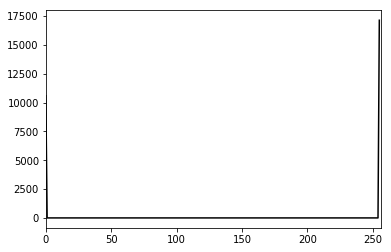

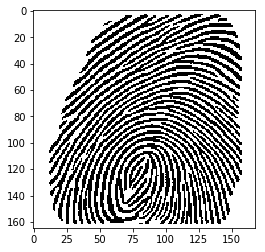

In [23]:
def draw_image_histogram(image, channels, color='k'):
    hist = cv2.calcHist([image], channels, None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

def show_grayscale_histogram(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    draw_image_histogram(grayscale_image, [0])
    plt.show()

finger_image = cv2.imread("threshold_result1.png")
show_grayscale_histogram(finger_image)
plt.imshow(finger_image)

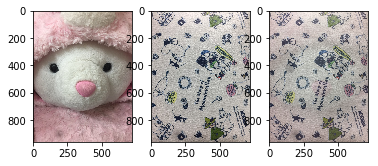

In [174]:
#Add/Subtract

#Add
lena = cv2.imread("./bear.jpg")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

pattern = cv2.imread("./moomin.jpg")
pattern = cv2.cvtColor(pattern, cv2.COLOR_BGR2RGB)

alpha = 0.2
beta = 1-alpha
mixed = (alpha * lena) + (beta * pattern)
mixed = np.uint8(mixed)

plt.subplot(1, 3, 1)
plt.imshow(lena)
plt.subplot(1, 3, 2)
plt.imshow(pattern)
plt.subplot(1, 3, 3)
plt.imshow(mixed)


#Subtract
img1 = cv2.imread("./f1.jpg", 0)
img2 = cv2.imread("./f2.jpg", 0)

alpha = 0.8
beta = 1-alpha
img_diff = (alpha * img1) - (beta * img2)
img_diff = np.uint8(img_diff)

# img_diff = np.abs(img1 - img2)

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.figure()
plt.imshow(img_diff, cmap='gray', vmin=0, vmax=255)
plt.colorbar()